<a href="https://colab.research.google.com/github/ducvuuit/CS114.K21.KHTN/blob/master/18520194_Lab7_PredictingHousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cài đặt và import thư viện Turicreate


In [0]:

pip install turicreate


     |████████████████████████████████| 91.8MB 44kB/s 
     |████████████████████████████████| 2.1MB 49.4MB/s 
     |████████████████████████████████| 20.2MB 1.3MB/s 
     |████████████████████████████████| 3.4MB 47.2MB/s 
     |████████████████████████████████| 86.3MB 49kB/s 
     |████████████████████████████████| 3.8MB 47.1MB/s 
     |████████████████████████████████| 450kB 45.9MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0
  Found existing installation: llvmlite 0.29.0
    Uninstalling llvmlite-0.29.0:
      Successfully uninstalled llvmlite-0.29.0
  Found existing installation: google-auth-oauthlib 0.4.0
    Uninstalling google-auth-oauthlib-0.4.0:
      Successfully uninstalled google-auth-oauthlib-

In [0]:
import turicreate

#Tải lên dữ liệu bán nhà (Upload từ driver)

In [0]:
#import SFrame để đọc file định dạng .frame
from turicreate import SFrame

In [6]:
# clone drive vào gg colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Tải dữ liệu lên
sales = SFrame(data = '/content/gdrive/My Drive/datalab7/home_data.sframe/')

In [9]:
#hiển thị dữ liệu dưới dạng table
sales

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    |    2.0    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000.0 |   4.0    |    4.5    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500.0 |   3.0    |    2.25   |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850.0 |   3.0    |    1.5    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500.0 |   3.0    |    1.0    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000.0 |   3.0    |    2.5    |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1180.0   |  5650.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2570.0   |  7242.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    770.0    | 10000.0  |  1.0   |     0      |  0   |     3     |  6.0  |
|    1960.0   |  5000.0  |  1.0   |     0      |  0   |     5     |  7.0  |
|    1680.0   |  8080.0  |  1.0   |     0      |  0   |     3     |  8.0  |
|    5420.0   | 101930.0 |  1.0   |     0      |  0   |     3     |  11.0 |
|    1715.0   |  6819.0  |  2.0   |     0      |  0   |     3     |  7.0  |
|    1060.0   |  9711.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1780.0   |  7470.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    1890.0   |  6560.0  |  2.0   |     0      |  0   |     3     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1180.0   |      0.0      |  1955.0  |     0.0      |  98178  | 47.51123398 |
|   2170.0   |     400.0     |  1951.0  |    1991.0    |  98125  | 47.72102274 |
|   770.0    |      0.0      |  1933.0  |     0.0      |  98028  | 47.73792661 |
|   1050.0   |     910.0     |  1965.0  |     0.0      |  98136  |   47.52082  |
|   1680.0   |      0.0      |  1987.0  |     0.0      |  98074  | 47.61681228 |
|   3890.0   |     1530.0    |  2001.0  |     0.0      |  98053  | 47.65611835 |
|   1715.0   |      0.0      |  1995.0  |     0.0      |  98003  | 47.30972002 |
|   1060.0   |      0.0      |  1963.0  |     0.0      |  98198  | 47.40949984 |
|   1050.0   |     730.0     |  1960.0  |     0.0      |  98146  | 47.51229381 |
|   1890.0   |      0.0      |  2003.0  |     0.0      |  98038  | 47.36840673 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
|  -122.3188624 |     1690.0    | ... |
| -122.23319601 |     2720.0    | ... |
| -122.39318505 |     1360.0    | ... |
| -122.04490059 |     1800.0    | ... |
| -122.00528655 |     4760.0    | ... |

# Xem xét các biều đồ biểu thị dữ liệu

In [10]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [11]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Sử dụng model regression để dự đoán giá nhà từ diện tích nhà đã cho

In [0]:
#chia 2 tập dữ liệu để tranning và để test
training_set, test_set = sales.random_split(.8,seed=0)

## trainning model


In [13]:
#sử dụng model LR để huận luyện dữ liệu
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.003591     | 4350712.237572     | 2326452.884901       | 262662.166797                   | 268230.503131                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Đánh giá độ hiệu quả của model


In [14]:
print (test_set['price'].mean())

543054.042563


In [15]:
print (sqft_model.evaluate(test_set))

{'max_error': 4144473.4284627927, 'rmse': 255187.5687815757}


# MỞ RỘNG TỪ MODEL ĐÃ CHO
  

In [16]:
sqft_model.coefficients

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -46810.5478639 |  5036.903373  |
| sqft_living |  None | 281.833884671  | 2.21529033823 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

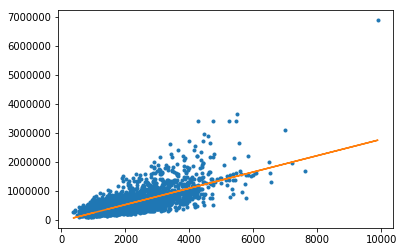

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Sử dụng các đặc tính khác của dữ liệu (khác diện tích)

In [0]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [19]:
sales[my_features].show()

Materializing SFrame

In [20]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Xây dựng model khi thêm các thuộc tính mới


In [21]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.043011     | 4100743.605207     | 2137758.576890       | 187140.533712                   | 225658.595464                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# So sánh mô hình phức tạp và mô hình đơn giản

In [22]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [23]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4144473.4284627927, 'rmse': 255187.5687815757}
{'max_error': 3169820.474359415, 'rmse': 180283.56169744427}


# áp dụng các model đã học để dữ đoán

---



In [0]:
#Dự đoán nhà có id là 5309....
house1 = sales[sales['id']=='5309101200']

In [25]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [26]:
print (house1['price'])

[620000.0, ... ]


In [27]:
print (sqft_model.predict(house1))

[629590.7753476811]


In [28]:
print (my_features_model.predict(house1))

[728405.6881319777]


## Prediction for a second house, a fancier one

In [0]:
#dự đoán gias nhà có id = 1925...
house2 = sales[sales['id']=='1925069082']

In [30]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [31]:
print (sqft_model.predict(house2))

[1260898.6770118384]


In [32]:
print (my_features_model.predict(house2))

[1227591.0914066508]


## Prediction for a super fancy home

In [0]:
# Dự đoán nhà có đầy đủ 20 features
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [34]:
# Kết quả dự đoán
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[14918364.10580877]
